In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the datasets
pd.set_option('display.float_format', lambda x: '%.3f' % x)
loan = pd.read_csv('loan.csv', encoding= 'unicode_escape')


In [3]:
#Understanding the datasets and filling table 1.1
loan.isnull().sum()
loan.shape
loan[(loan.loan_status == 'Current')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
32,1065420,1299514,10000,10000,9975.000,60 months,15.96%,242.970,C,C5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
39,1069346,1304237,12500,12500,12475.000,60 months,12.69%,282.440,B,B5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
86,1063958,1297940,14000,14000,13975.000,60 months,17.27%,349.980,D,D3,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
95,1068575,1303001,15300,15300,15275.000,60 months,22.06%,423.100,F,F4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.000,60 months,6.00%,218.990,E,E3,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
15981,738420,935790,6000,6000,6000.000,60 months,10.37%,128.580,B,B3,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
16361,733695,930086,19200,19200,18847.763,60 months,10.74%,414.970,B,B4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
16609,728422,924106,9350,9350,9350.000,60 months,10.00%,198.660,B,B2,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


In [4]:
#Checking count of records for each loan status type
loan.loan_status.value_counts()

#Filtering out record with loan status "Current"
df = loan[~(loan.loan_status == 'Current')]
df.loan_status.unique()
df.shape

(38577, 111)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
5,1075269,1311441,5000,5000,5000.000,36 months,7.90%,156.460,A,A4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


In [6]:
df = df.loc[:, df.isin([' ','NULL',0,np.nan]).mean() < .6]
df.shape

#df.loc[:, df.isin([' ','NULL',0, np.nan]).mean() > .6]




(38577, 41)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,f,5863.155,5833.840,5000.000,863.160,Jan-15,171.620,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,f,1008.710,1008.710,456.460,435.170,Apr-13,119.660,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,f,3005.667,3005.670,2400.000,605.670,Jun-14,649.910,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,f,12231.890,12231.890,10000.000,2214.920,Jan-15,357.480,Apr-16,1,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.000,36 months,7.90%,156.460,A,A4,...,f,5632.210,5632.210,5000.000,632.210,Jan-15,161.030,Jan-16,1,INDIVIDUAL


In [8]:

#df.loc[df.isin([np.nan]).mean() > .6, ]

#checking data types
#df.info()

#remove months from term, 

#df[complete.cases(df),]
#df.info()

df.isnull().sum()

df.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt          38577 non-null  int64  
 4   funded_amnt_inv      38577 non-null  float64
 5   term                 38577 non-null  object 
 6   int_rate             38577 non-null  object 
 7   installment          38577 non-null  float64
 8   grade                38577 non-null  object 
 9   sub_grade            38577 non-null  object 
 10  emp_title            36191 non-null  object 
 11  emp_length           37544 non-null  object 
 12  home_ownership       38577 non-null  object 
 13  annual_inc           38577 non-null  float64
 14  verification_status  38577 non-null  object 
 15  issue_d              38577 non-null 

In [10]:
#removing unnecessary features
df2 = df.drop(['member_id','id','pymnt_plan','url','desc','title','zip_code','addr_state','earliest_cr_line','initial_list_status'], axis=1)
df2 = df2.drop(['application_type','policy_code','funded_amnt','funded_amnt_inv','emp_title'], axis = 1)

df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  object 
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_length           37544 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  dti                  38577 non-null  float64
 14  inq_last_6mths       38577 non-null  int64  
 15  open_acc             38577 non-null 

In [11]:
df2.head()
#df2.term.value_counts()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,36 months,10.65%,162.870,B,B2,10+ years,RENT,24000.000,Verified,...,13648,83.70%,9,5863.155,5833.840,5000.000,863.160,Jan-15,171.620,May-16
1,2500,60 months,15.27%,59.830,C,C4,< 1 year,RENT,30000.000,Source Verified,...,1687,9.40%,4,1008.710,1008.710,456.460,435.170,Apr-13,119.660,Sep-13
2,2400,36 months,15.96%,84.330,C,C5,10+ years,RENT,12252.000,Not Verified,...,2956,98.50%,10,3005.667,3005.670,2400.000,605.670,Jun-14,649.910,May-16
3,10000,36 months,13.49%,339.310,C,C1,10+ years,RENT,49200.000,Source Verified,...,5598,21%,37,12231.890,12231.890,10000.000,2214.920,Jan-15,357.480,Apr-16
5,5000,36 months,7.90%,156.460,A,A4,3 years,RENT,36000.000,Source Verified,...,7963,28.30%,12,5632.210,5632.210,5000.000,632.210,Jan-15,161.030,Jan-16


In [12]:
#changing data types
# remove months from term
# remove % from interest rate, revol_util

df2['int_rate'] = df2['int_rate'].str.strip('%').astype('float')
df2['revol_util'] = df2['revol_util'].str.strip('%').astype('float')


In [13]:
# 
df2['term'] = df2['term'].str.strip('months').astype('int')

In [14]:
df2.head()
df2.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [15]:
df2.head()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  int32  
 2   int_rate             38577 non-null  float64
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_length           37544 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  dti                  38577 non-null  float64
 14  inq_last_6mths       38577 non-null  int64  
 15  open_acc             38577 non-null 

In [16]:
#Changing Loan Status from text to Boolean values
df2.loan_status.unique()
df2.loan_status = df2.loan_status.apply(lambda x : 0 if x == 'Fully Paid' else ( 1 if x == 'Charged Off' else x) )
df2.loan_status.value_counts()

#df2.loan_status


0    32950
1     5627
Name: loan_status, dtype: int64

In [17]:

df2[['issue_d','last_pymnt_d','last_credit_pull_d']] = df2[['issue_d','last_pymnt_d','last_credit_pull_d']].apply(pd.to_datetime,format='%b-%y')

df2.last_credit_pull_d.value_counts()
df2['issue_year'] = pd.DatetimeIndex(df2['issue_d']).year
df2['issue_m'] = pd.DatetimeIndex(df2['issue_d']).month
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   term                 38577 non-null  int32         
 2   int_rate             38577 non-null  float64       
 3   installment          38577 non-null  float64       
 4   grade                38577 non-null  object        
 5   sub_grade            38577 non-null  object        
 6   emp_length           37544 non-null  object        
 7   home_ownership       38577 non-null  object        
 8   annual_inc           38577 non-null  float64       
 9   verification_status  38577 non-null  object        
 10  issue_d              38577 non-null  datetime64[ns]
 11  loan_status          38577 non-null  int64         
 12  purpose              38577 non-null  object        
 13  dti                  38577 non-

In [18]:
df2.reset_index(inplace=True, drop=True)
loan_final = df2
loan_final.shape

(38577, 28)

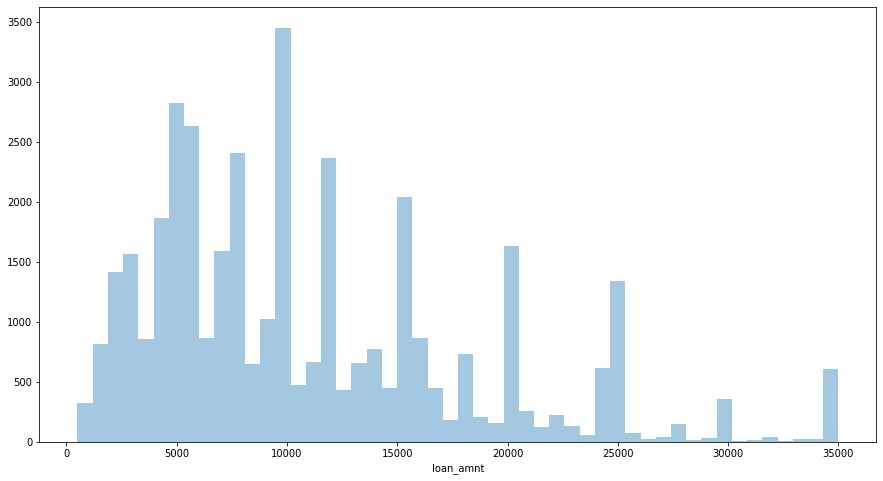

In [19]:
#Univariate Analysis
loan_final.loan_amnt.isnull().sum()

#Checking Loan amount
plt.figure(figsize=(15,8))
sns.distplot(loan_final.loan_amnt, kde = False)
plt.show
loan_final.loan_amnt.describe()

#Creating Bins For Loan Amount 
def loan_amount_bkt(amount):
    if amount < 5000:
        return 'Low'
    elif amount >=5000 and amount < 15000:
        return 'Medium'
    else :
        return 'High'

loan_final['loan_amnt_bkt'] = loan_final['loan_amnt'].apply(lambda x: loan_amount_bkt(x))


In [20]:
#Checking Annual Income
#Creating Bins For Annual Income
def ann_inc_bkt(amount):
    if amount < 100000:
        return 'Medium'
    elif amount > 100000 and amount <=1000000:
        return 'High'
    else :
        return 'Very High'



loan_final['ann_inc_bkt'] = loan_final['annual_inc'].apply(lambda x: ann_inc_bkt(x))
loan_final.ann_inc_bkt.value_counts()

Medium       32598
High          5467
Very High      512
Name: ann_inc_bkt, dtype: int64

In [21]:
#Creating Buckets for DTI

def dti_bkt(dtiStr): # Function to bucket dti
    if dtiStr <= 10:
        return 'Low'
    elif dtiStr > 10 and dtiStr <=20:
        return 'Medium'
    else:
        return 'High'
    

loan_final['dti_bkt'] = loan_final['dti'].apply(lambda x: dti_bkt(x)) # Bucket Dti
loan_final.dti_bkt.value_counts()

Medium    18441
Low       12935
High       7201
Name: dti_bkt, dtype: int64

In [22]:
# Bucket interest rates 
def int_rate_bkt(amount):
    if amount <= 10:
        return 'Low'
    elif amount > 10 and amount <=20:
        return 'Medium'
    else :
        return 'High'
loan_final['int_rate_bkt'] = loan_final['int_rate'].apply(lambda x: int_rate_bkt(x))
loan_final[['int_rate_bkt','int_rate']]


,int_rate_bkt,int_rate
0,Medium,10.650
1,Medium,15.270
2,Medium,15.960
3,Medium,13.490
4,Low,7.900
...,...,...
38572,Low,8.070
38573,Medium,10.280
38574,Low,8.070
38575,Low,7.430


count     38577
unique        7
top           B
freq      11675
Name: grade, dtype: object

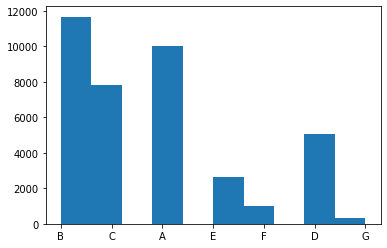

In [23]:
#Plotting histogram for grade and checking mode value
plt.hist(loan_final.grade)
plt.show
loan_final.grade.describe()

#Finding : Maximum applicants have Grade B

count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object

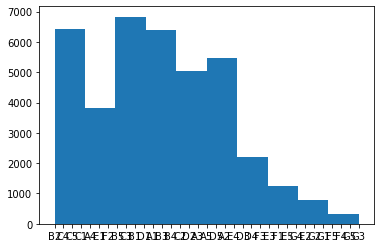

In [24]:
#Plotting histogram for subgrade and checking mode value
plt.hist(loan_final.sub_grade)
plt.show
loan_final.sub_grade.describe()

#Finding : Maximum applicants have sub_grade A4

In [25]:
#Plotting histogram for emploment length and checking mode value
#plt.hist(loan_final.emp_length)
#plt.show
#
loan_final.emp_length.isnull().sum()

loan_final.emp_length.describe()
loan_final.emp_length.value_counts()

#Imputing emp_length since % of missing data is 2.75 %. Imputing with mode since it is a categorical data

loan_final.emp_length = loan_final.emp_length.fillna('10+ years')






<function matplotlib.pyplot.show(*args, **kw)>

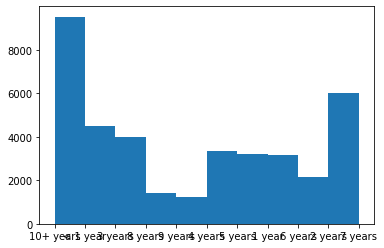

In [26]:
plt.hist(loan_final.emp_length)
plt.show
#loan_final.sub_grade.describe()

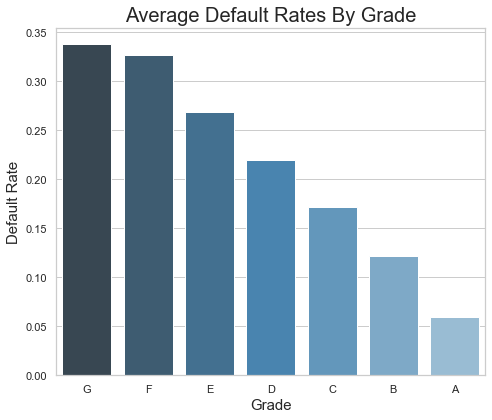

In [44]:
#Segmented Univariate Analysis
#Plotting Data using Seaborn Barplot
#Using Seaborn, because it works best with dataframes


#Top Defaulters by Grade
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(["grade"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'grade', y = 'loan_status', data = loan_final,ci=None, palette="Blues_d", order = result['grade'] )

#set labels
plt.xlabel("Grade", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Grade", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Grade.png", dpi=100)
plt.show()


**Observations** : Higher grades are resulting into higher default rates. Grades G,F,E and D are proving to be highly unsafe and shoud be avoided.

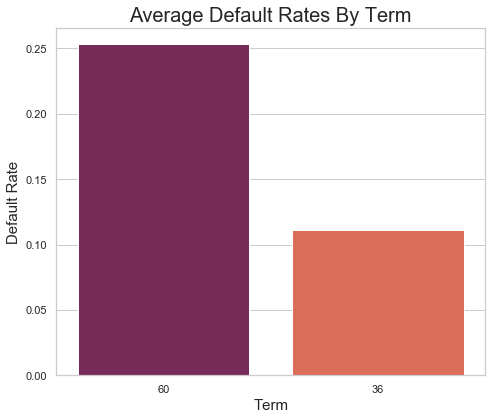

In [47]:
#Top Defaulters by Grade
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(["term"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'term', y = 'loan_status', data = loan_final,ci=None, palette="rocket",order = result['term'] )

#set labels
plt.xlabel("Term", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Term", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Term.png", dpi=100)
plt.show()

**Observations** : Loans with term of 60 months are resulting to higher defaults. Let's break this further by purpose and see which category of loans are riskier.

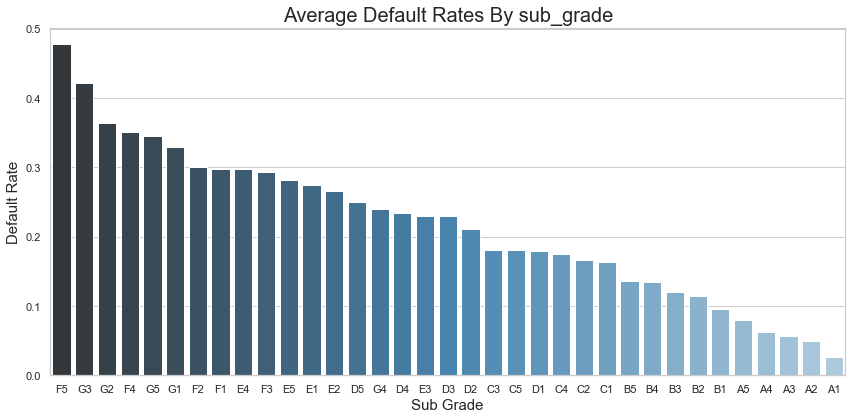

In [29]:
#Top Defaulters by SubGrades
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
result = loan_final.groupby(["sub_grade"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'sub_grade', y = 'loan_status', data = loan_final,ci=None, palette="Blues_d", order = result['sub_grade'] )

#set labels
plt.xlabel("Sub Grade", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By sub_grade", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By sub_grade.png", dpi=100)
plt.show()

**Observations** : As observed the trend in grades, subgrades under grade F,G,E, and D are proving to be highly risky.

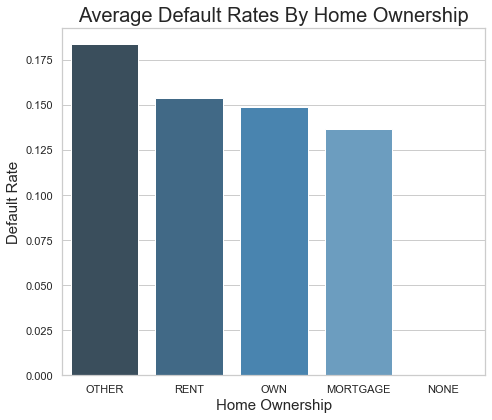

In [30]:
#Top Defaulters by Home Ownership
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(["home_ownership"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'home_ownership', y = 'loan_status', data = loan_final,ci=None, palette="Blues_d", order = result['home_ownership'] )

#set labels
plt.xlabel("Home Ownership", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Home Ownership", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Home Ownership.png", dpi=100)
plt.show()

**Observations** : Loans marked with "Other" home ownership is resulting into more defaults. 

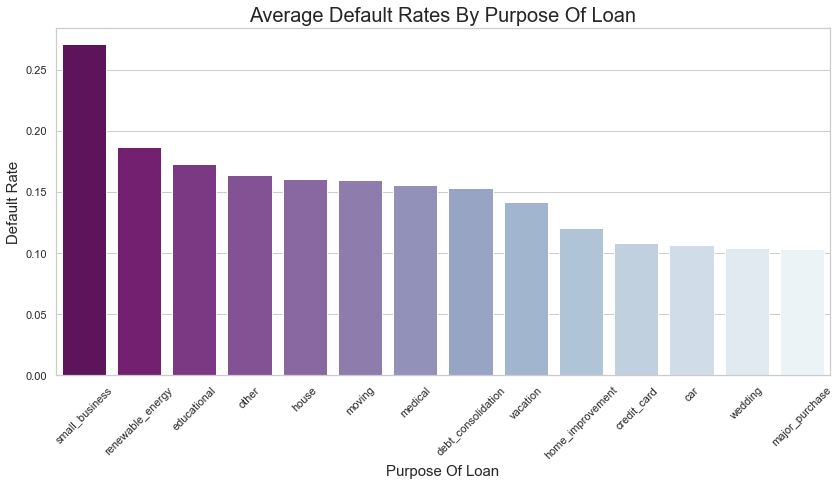

In [54]:
#Top Defaulters by Purpose Of Loan
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
result = loan_final.groupby(["purpose"])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'purpose', y = 'loan_status', data = loan_final,ci=None, palette="BuPu_r", order = result['purpose'] )

#set labels
plt.xlabel("Purpose Of Loan", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Purpose Of Loan", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Purpose Of Loan.png", dpi=100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


**Observations** : Now this is an interesting insight. Small businesses loan category is proving to be very risky followed by renewable energy and educational loans. Let's break this further down by term, interest rate factors in bivariate analysis.

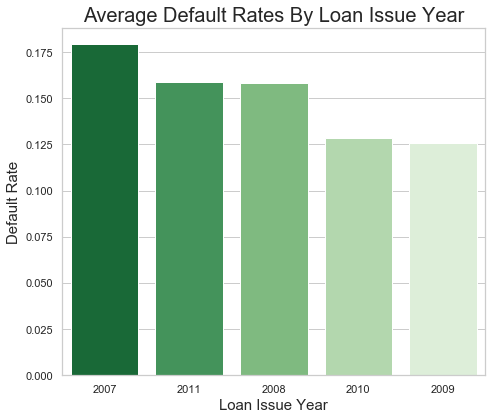

In [85]:
#Top Defaulters by Issued Year
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(['issue_year'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'issue_year', y = 'loan_status', data = loan_final,ci=None, palette="Greens_r", order = result['issue_year'])

#set labels
plt.xlabel("Loan Issue Year", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Loan Issue Year", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Loan Issue Year.png", dpi=100)
plt.show()

**Observations** : Loans issued in year 2007 resulted into highest defaults. This could be due to 2008 economical crisis. This should be looked into by Lending Club

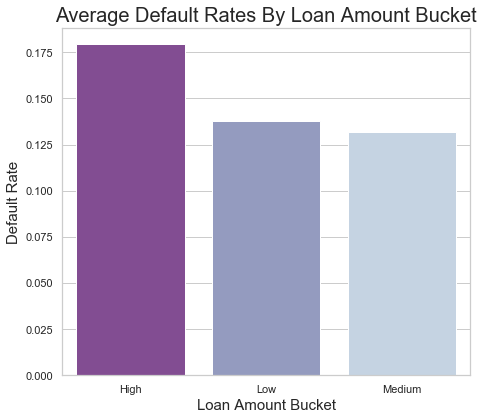

In [89]:
#Top Defaulters by Loan Amount
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(['loan_amnt_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'loan_amnt_bkt', y = 'loan_status', data = loan_final,ci=None, palette="BuPu_r", order = result['loan_amnt_bkt'])

#set labels
plt.xlabel("Loan Amount Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Loan Amount Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Loan Amount Bucket.png", dpi=100)
plt.show()

**Observations** : So only the high loan buckets are proving to be risky. Let's analyze this further breaking down by term and category.

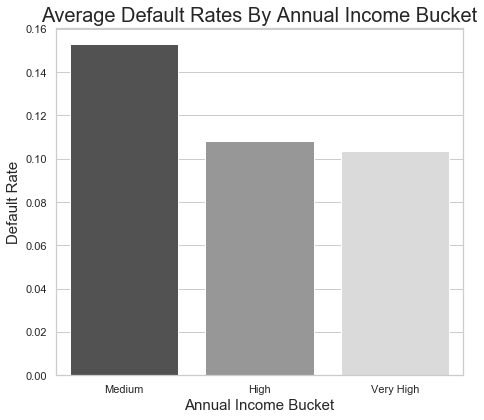

In [94]:
#Top Defaulters by Annual Income
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(['ann_inc_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'ann_inc_bkt', y = 'loan_status', data = loan_final,ci=None, palette="Greys_r", order = result['ann_inc_bkt'])

#set labels
plt.xlabel("Annual Income Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Annual Income Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Annual Income Bucket.png", dpi=100)
plt.show()

**Observations** : Applicants with Moderate Annual Income are resulting into highest defaults. Let's see in bivariate analysis if this is because they applied for higher loan amounts.

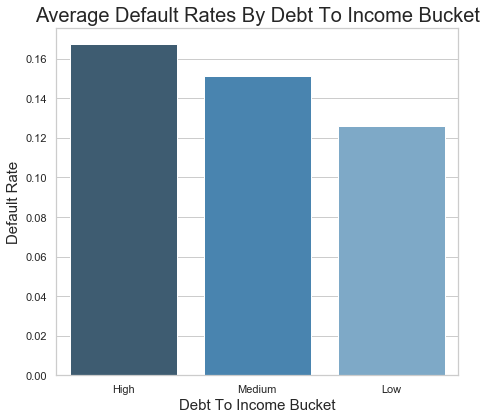

In [35]:
#Top Defaulters by Debt To Income Ratio
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(['dti_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'dti_bkt', y = 'loan_status', data = loan_final,ci=None, palette="Blues_d", order = result['dti_bkt'])

#set labels
plt.xlabel("Debt To Income Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Debt To Income Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Debt To Income Bucket.png", dpi=100)
plt.show()

**Observations** : This is as per the expectation. Higher DTI is resulting into higher defaults.

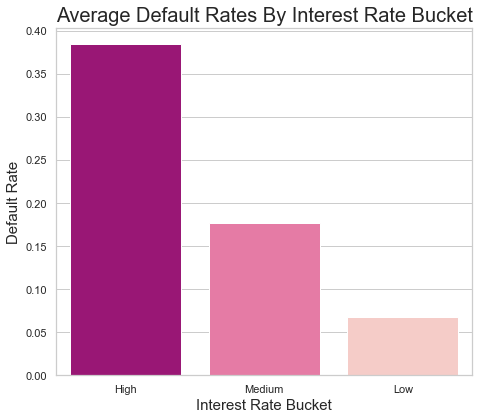

In [55]:
#Top Defaulters by Interest Rate Bucket
plt.figure(figsize=(7,6))
sns.set(style="whitegrid")
result = loan_final.groupby(['int_rate_bkt'])['loan_status'].aggregate(np.mean).reset_index().sort_values('loan_status', ascending = False)
ax = sns.barplot(x= 'int_rate_bkt', y = 'loan_status', data = loan_final,ci=None, palette="RdPu_r", order = result['int_rate_bkt'])

#set labels
plt.xlabel("Interest Rate Bucket", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Average Default Rates By Interest Rate Bucket", size=20)
plt.tight_layout()
plt.savefig("Average Default Rates By Interest Rate Bucket.png", dpi=100)
plt.show()

**Observations** : Now this is an usual trend, risky loans were charged higher interest rates and are reulting into highest defaults.

In [37]:
# Bivariate Analysis

#Filter top 3 Purposes of Loans with highest default as we would like to focus our analysis on top 3 defaulted categories.
top_3 = loan_final[loan_final.purpose.isin(['small_business', 'renewable_energy','educational'])]
top_3.purpose.unique()

array(['small_business', 'renewable_energy', 'educational'], dtype=object)

In [95]:
#Let's create a function for bivariate analysis, since this will be utilized multiple times.
def bivariate(var):
    
    plt.figure(figsize=[12, 7])
    
    plot = sns.barplot(x=var, y="loan_status", hue='purpose',data=top_3, ci=None, palette="pastel")
    plt.xlabel(var, size=15)
    plt.ylabel("Avg. Loan Default Rate", size=15)
    plt.title("Default Rate vs."+" "+var, size=20)
    
    plt.setp(plot.get_legend().get_texts(), fontsize='20') # for legend text
    plt.setp(plot.get_legend().get_title(), fontsize='25') # for legend title

    plt.tight_layout()
    plt.show()

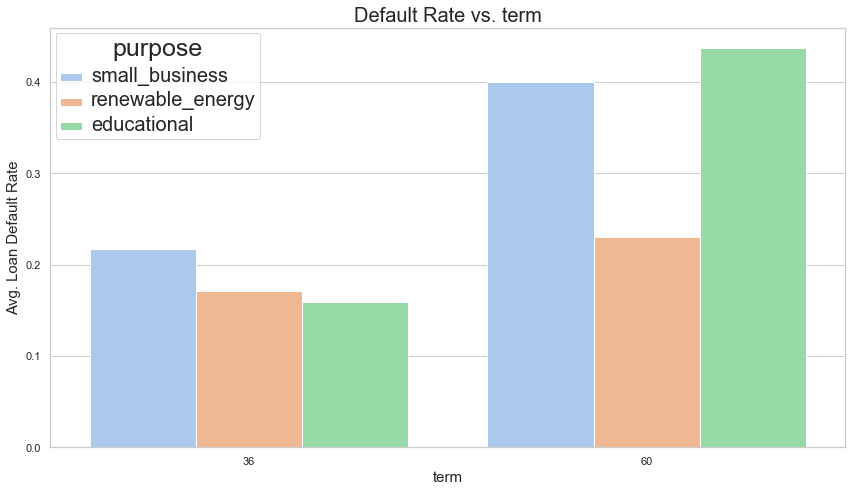

In [96]:
bivariate('term')

**Observations** :Looking at the data above, Lending Club should stop giving higher term loan to Smaller Businesses and Educational purposes because more than 35% of these are defaulting. 

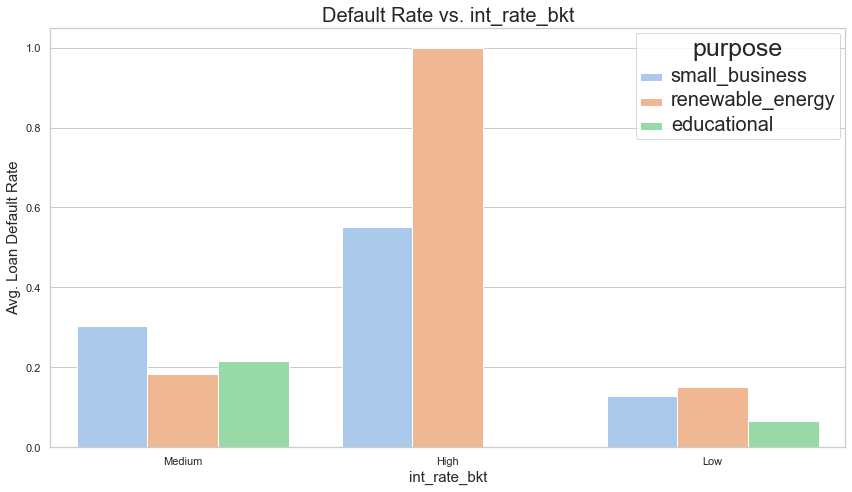

In [97]:
#Plot for interest rate vs average default rate for top 3 default purposes
bivariate('int_rate_bkt')

**Observations** : Small Businesses and Renewable energy are again among top defaulters in each interest rate bucket. LC should be highly cautious while giving out loans for these purposes, specially among higher interest rate buckets. Renewable enrgies are 100 % defaulters in high interest buckets.

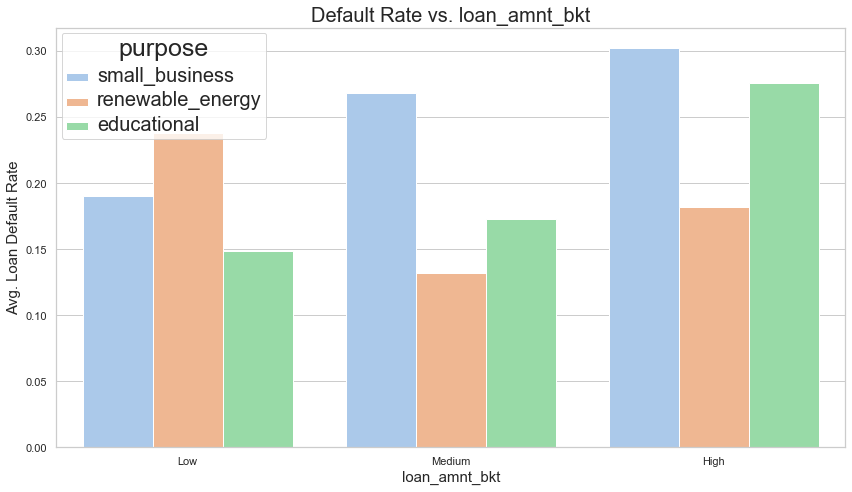

In [99]:
#Plot for loan amount vs average default rate for top 3 default purposes
bivariate('loan_amnt_bkt')

**Observations** : 1. Loans should not be approved for educational purposes and small businesses in high loan amount bucket because more than 25% of them are defaulting.

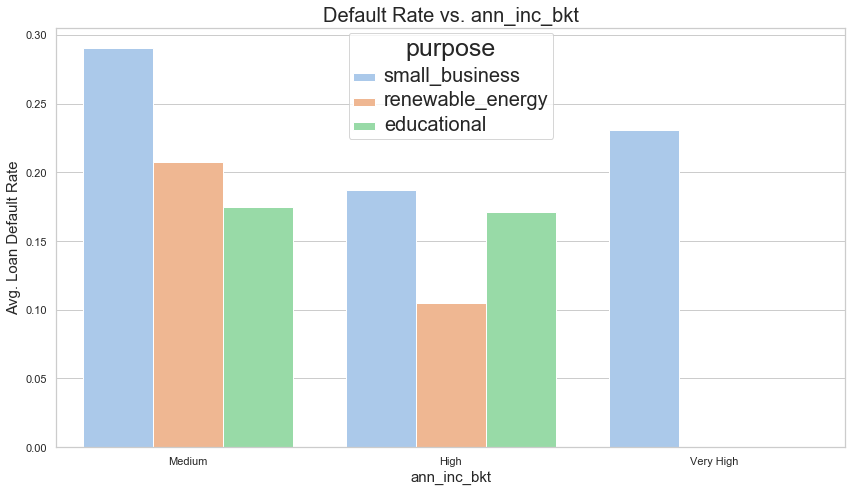

In [100]:
bivariate('ann_inc_bkt')

**Observations** : Small businesses are resulting into highest defaulters in all annual income buckets specially it is very high in medium annual income buckets

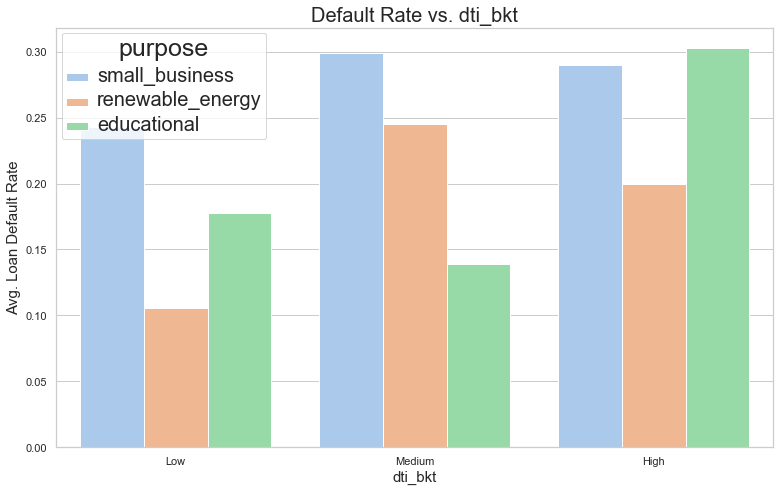

In [66]:
bivariate('dti_bkt')

**Observations** : Small businesses and educational loans with high and medium dti bucket are very risky.

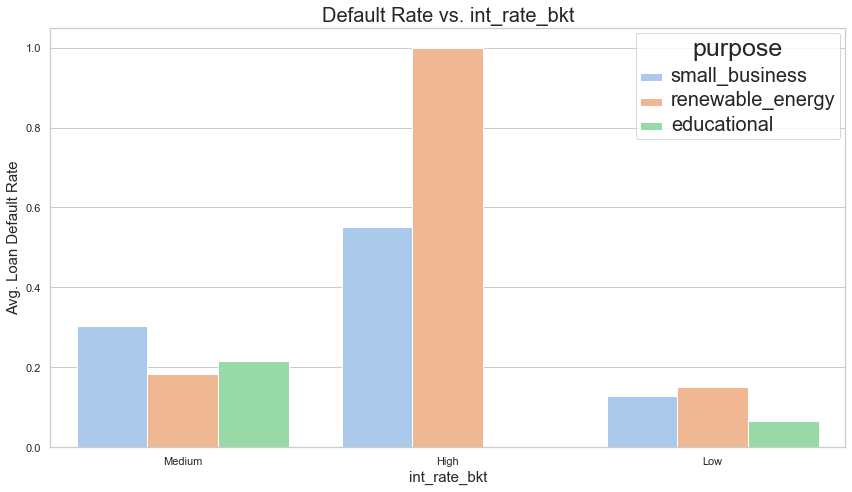

In [101]:
bivariate('int_rate_bkt')

**Observations** : Renewable energies with with high interest rates should not be given loans because they are resulting into 100% defaults


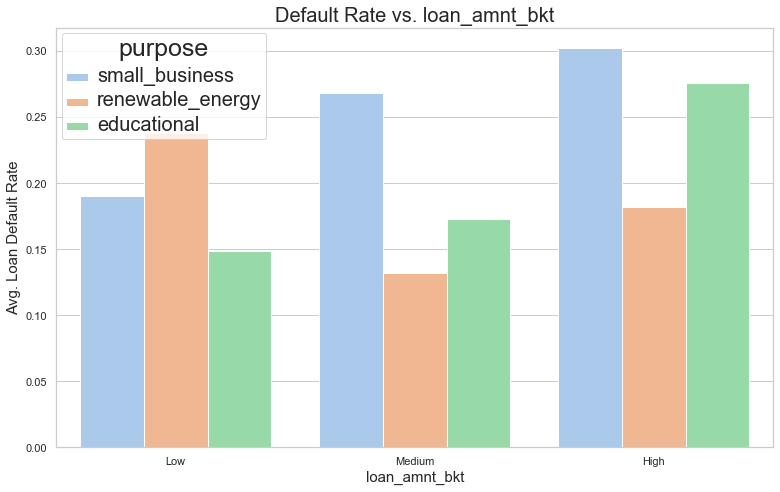

In [73]:
sns

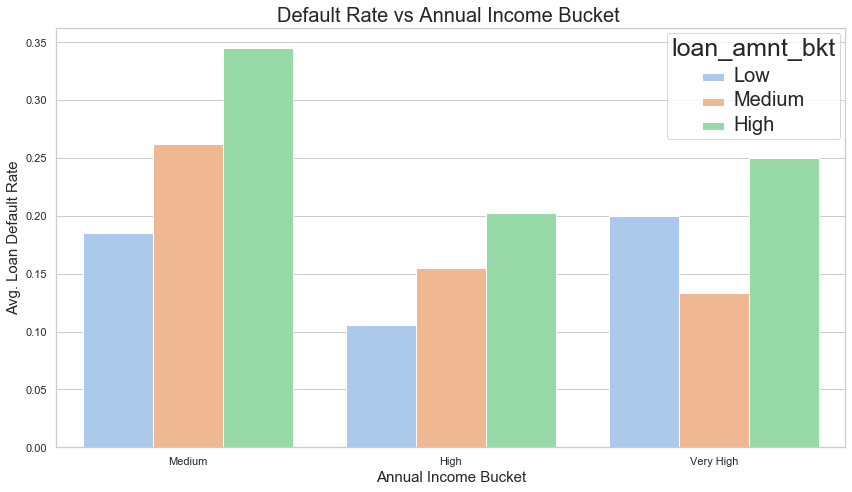

In [109]:
# Default Rate Vs Annual Income Bucket   
    plt.figure(figsize=[12, 7])
    
    plot = sns.barplot(x= 'ann_inc_bkt', y="loan_status", hue='loan_amnt_bkt',data=top_3, ci=None, palette="pastel")
    plt.xlabel("Annual Income Bucket", size=15)
    plt.ylabel("Avg. Loan Default Rate", size=15)
    plt.title("Default Rate vs Annual Income Bucket ", size=20)
    
    plt.setp(plot.get_legend().get_texts(), fontsize='20') # for legend text
    plt.setp(plot.get_legend().get_title(), fontsize='25') # for legend title

    plt.tight_layout()
    plt.show()

**Observations** : In segmented univariate analysis, we had found out that people with medium annual income are resulting into higher defaults. Now we understand why, this is because people with medium annaul income are applying for higher loan amounts and hence defaulting. These loans should be stopped by LC.